In [1]:
import keras
from tensorflow.keras.layers import Input
from keras.models import Sequential,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import ELU, PReLU, LeakyReLU

import tensorflow as tf
from tensorflow import keras
import keras.layers as layers
import matplotlib.pyplot as plt


c:\Users\brigh\Documents\GitHub\warehouse\.venv\Lib\site-packages\tensorflow\python\keras\engine\training_arrays_v1.py:37: UserWarning: A NumPy version >=1.22.4 and <2.3.0 is required for this version of SciPy (detected version 2.3.3)
  from scipy.sparse import issparse  # pylint: disable=g-import-not-at-top


In [2]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.cifar10.load_data()

In [3]:
CLASS_NAMES= ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [4]:
validation_images, validation_labels = train_images[:5000], train_labels[:5000]
train_images, train_labels = train_images[5000:], train_labels[5000:]

In [5]:
train_ds = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
test_ds = tf.data.Dataset.from_tensor_slices((test_images, test_labels))
validation_ds = tf.data.Dataset.from_tensor_slices((validation_images, validation_labels))

In [6]:
train_ds

<_TensorSliceDataset element_spec=(TensorSpec(shape=(32, 32, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(1,), dtype=tf.uint8, name=None))>

#### **Preprocessing**

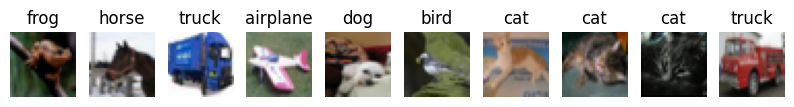

In [7]:
plt.figure(figsize=(10,10))
for i, (image, label) in enumerate(train_ds.take(10)):
    ax = plt.subplot(10,10,i+1)
    plt.imshow(image)
    plt.title(CLASS_NAMES[label.numpy()[0]])
    plt.axis('off')

- AlexNet network의  Input은 $227 \times 227$ Image임
- $ cifar10\    32 \times 32$ Input Image를  $227 \times 227$로 Resize

In [8]:
def process_images(image, label):
    # Normalize images to have a mean of 0 and standard deviation of 1
    image = tf.image.per_image_standardization(image)
    # Resize images from 32x32 to 277x277
    image = tf.image.resize(image, (227,227))
    return image, label

In [9]:
train_ds_size = tf.data.experimental.cardinality(train_ds).numpy()
test_ds_size = tf.data.experimental.cardinality(test_ds).numpy()
validation_ds_size = tf.data.experimental.cardinality(validation_ds).numpy()
print("Training data size:", train_ds_size)
print("Test data size:", test_ds_size)
print("Validation data size:", validation_ds_size)

Training data size: 45000
Test data size: 10000
Validation data size: 5000


In [10]:
train_ds = (train_ds
                  .map(process_images)
                  .shuffle(buffer_size=train_ds_size)
                  .batch(batch_size=32, drop_remainder=True))
test_ds = (test_ds
                  .map(process_images)
                  .shuffle(buffer_size=train_ds_size)
                  .batch(batch_size=32, drop_remainder=True))
validation_ds = (validation_ds
                  .map(process_images)
                  .shuffle(buffer_size=train_ds_size)
                  .batch(batch_size=32, drop_remainder=True))

In [11]:
print(train_ds)

<_BatchDataset element_spec=(TensorSpec(shape=(32, 227, 227, 3), dtype=tf.float32, name=None), TensorSpec(shape=(32, 1), dtype=tf.uint8, name=None))>


#### **Model** 과제에 맞게 경량화된 AlexNet 모델 정의

In [ ]:
model = keras.models.Sequential([
    Input(shape=(227, 227, 3)),
    keras.layers.Conv2D(filters=10, kernel_size=(3,3), strides=(4,4)),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    
    keras.layers.Conv2D(filters=10, kernel_size=(3,3), strides=(1,1), padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    
    keras.layers.Conv2D(filters=10, kernel_size=(3,3), strides=(1,1), padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    
    keras.layers.Conv2D(filters=10, kernel_size=(3,3), strides=(1,1), padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    
    keras.layers.Conv2D(filters=10, kernel_size=(3,3), strides=(1,1), padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    
    keras.layers.Flatten(),
    keras.layers.Dense(1000, activation='relu'),
    keras.layers.Dropout(0.5),
    
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dropout(0.5),
    
    keras.layers.Dense(10, activation='softmax')
])
model.summary()


#### **TensorBoard**
- TensorBoard is a tool that provides a suite of visualization and monitoring mechanisms

In [13]:
model.compile(loss='sparse_categorical_crossentropy', optimizer=tf.optimizers.SGD(learning_rate=0.001), metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 57, 57, 10)     │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 57, 57, 10)     │            40 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 57, 57, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 28, 28, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 10)     │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 28, 28, 10)     │            40 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 28, 28, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 13, 13, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 13, 13, 10)     │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 13, 13, 10)     │            40 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 13, 13, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 13, 13, 10)     │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 13, 13, 10)     │            40 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 13, 13, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 13, 13, 10)     │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 13, 13, 10)     │            40 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 13, 13, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 10)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 360)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1000)           │       361,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1000)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │       100,100 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 466,230 (1.78 MB)

 Trainable params: 466,130 (1.78 MB)

 Non-trainable params: 100 (400.00 B)

In [14]:
history = model.fit(train_ds,
          epochs = 10,
          validation_data=validation_ds)

Epoch 1/10


KeyboardInterrupt: 

#### **Evaluation**

In [ ]:
model.evaluate(test_ds)

In [ ]:
# 2. matplotlib을 사용해 훈련 과정의 정확도를 그래프로 그립니다.
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy') # 제목: 모델 정확도
plt.ylabel('Accuracy') # y축: 정확도
plt.xlabel('Epoch') # x축: 에포크
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# 정확도와 함께 손실(loss) 변화도 확인하면 좋습니다.
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss') # 제목: 모델 손실
plt.ylabel('Loss') # y축: 손실
plt.xlabel('Epoch') # x축: 에포크
plt.legend(['train', 'val'], loc='upper left')
plt.show()